## NOTEBOOK IMPORTS

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

## CONSTANTS

In [2]:
TOKEN_SPAM_PROB_FILE='SpamData/03_Testing/prob_spam.txt'
TOKEN_HAM_PROB_FILE='SpamData/03_Testing/prob_nonspam.txt'
TOKEN_ALL_PROB_FILE='SpamData/03_Testing/prob_all.txt'

TEST_FEATURE_MATRIX='SpamData/03_Testing/test_features.txt'
TEST_TARGET_FILE='SpamData/03_Testing/test_target.txt'

VOCAB_SIZE=2500

## LOAD THE DATA

In [3]:
X_test=np.loadtxt(TEST_FEATURE_MATRIX,delimiter=' ')
y_test=np.loadtxt(TEST_TARGET_FILE,delimiter=' ')
prob_token_spam=np.loadtxt(TOKEN_SPAM_PROB_FILE,delimiter=' ')
prob_token_ham=np.loadtxt(TOKEN_HAM_PROB_FILE,delimiter=' ')
prob_all_token=np.loadtxt(TOKEN_ALL_PROB_FILE,delimiter=' ')

## CALCULATING THE JOINT PROBABILITY

### THE DOT PRODUCT

In [4]:
X_test.shape

(1724, 2500)

In [5]:
prob_token_spam.shape

(2500,)

In [6]:
X_test.dot(prob_token_spam)

array([0.41793089, 0.14388672, 0.12419301, ..., 0.56773787, 0.0896434 ,
       0.25812794])

In [7]:
PROB_SPAM=0.3113

In [8]:
PROB_HAM=0.6887



### JOINT PROBABILITY IN LOG FORMAT

In [9]:
joint_log_spam=X_test.dot(np.log(prob_token_spam)-np.log(prob_all_token))+np.log(PROB_SPAM)

In [10]:
joint_log_spam

array([  22.42952352,    1.98026965,   17.83113426, ..., -365.37616615,
        -10.08030858, -110.74202721])

In [11]:
joint_log_ham=X_test.dot(np.log(prob_token_ham)-np.log(prob_all_token))+np.log(PROB_HAM)

In [12]:
joint_log_ham

array([-5.89963535e+01, -1.08669022e+01, -3.47692846e+01, ...,
        5.98074050e+01,  5.23647154e-02,  2.46217881e+01])

### SIMPLIFY

In [13]:
joint_log_spam=X_test.dot(np.log(prob_token_spam))+np.log(PROB_SPAM)
joint_log_ham=X_test.dot(np.log(prob_token_ham))+np.log(PROB_HAM)

In [14]:
prediction=joint_log_spam>joint_log_ham

## METRICS AND EVALUATION

### ACCURACY

In [15]:
correct_docs=(y_test==prediction).sum()
print('Docs classified correctly',correct_docs)
numdocs_wrong=(y_test!=prediction).sum()
print('Docs classified in correctly',numdocs_wrong)

Docs classified correctly 1685
Docs classified in correctly 39


In [16]:
accuracy=correct_docs/len(y_test)

In [17]:
accuracy

0.9773781902552204

In [18]:
print('Accuracy of the model is ', round(accuracy*100,2))
print('Fraction classified incorrectly is ', round(100-accuracy*100,2))

Accuracy of the model is  97.74
Fraction classified incorrectly is  2.26


## VISUALIZING THE RESULT

In [19]:
yaxis_label='P( X | Spam)'
xaxis_label='P( X | nonspam)'
linedata=np.linspace(-14000,1,1000)

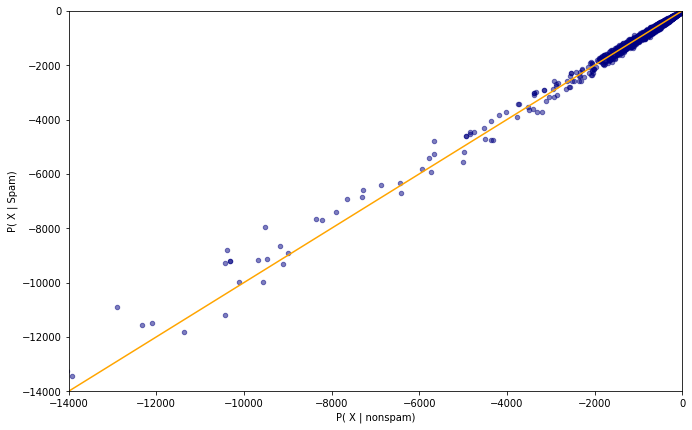

In [20]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label)
plt.ylabel(yaxis_label)

plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham,joint_log_spam,alpha=0.5,s=20,color='navy')
plt.plot(linedata,linedata,color='orange')
plt.show()

## DECISION BOUNDARY

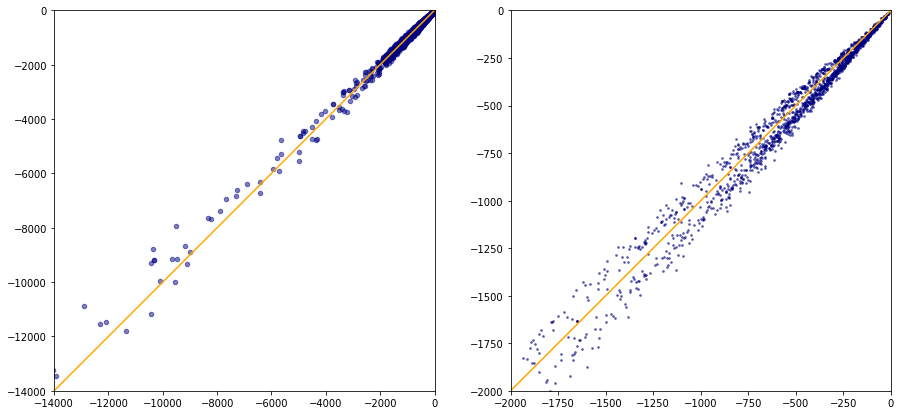

In [21]:
plt.figure(figsize=(15,7))
plt.xlabel(xaxis_label)
plt.ylabel(yaxis_label)
plt.subplot(121)
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham,joint_log_spam,alpha=0.5,s=20,color='navy')
plt.plot(linedata,linedata,color='orange')

plt.subplot(122)
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.scatter(joint_log_ham,joint_log_spam,alpha=0.5,s=3,color='navy')
plt.plot(linedata,linedata,color='orange')
plt.show()

(-2000.0, 1.0)

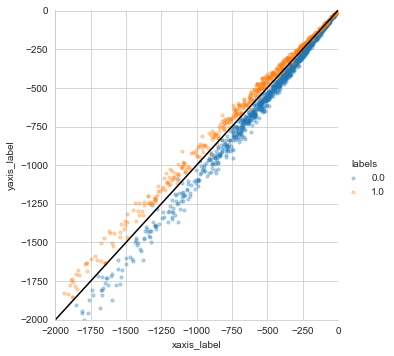

In [22]:
summary_df=pd.DataFrame({'xaxis_label':joint_log_ham,'yaxis_label':joint_log_spam,'labels':y_test})
sns.set_style('whitegrid')

sns.lmplot(x='xaxis_label',y='yaxis_label',hue='labels',data=summary_df,fit_reg=False,scatter_kws={'alpha':0.3,'s':10})
plt.plot(linedata,linedata,color='black')
plt.xlim([-2000,1])
plt.ylim([-2000,1])

In [23]:
summary_df

,xaxis_label,yaxis_label,labels
0,-1298.970571,-1217.544694,1.0
1,-276.045843,-263.198671,1.0
2,-429.086056,-376.485637,1.0
3,-1541.650257,-1464.242152,1.0
4,-1295.475358,-1222.636583,1.0
...,...,...,...
1719,-2063.549357,-1947.472897,0.0
1720,-787.106804,-877.082787,0.0
1721,-4325.891819,-4751.075390,0.0
1722,-190.840088,-200.972761,0.0


In [30]:
confusion_matrix = metrics.confusion_matrix(prediction, y_test)
confusion_matrix

array([[1117,   21],
       [  18,  568]], dtype=int64)

In [33]:
TPR=confusion_matrix[0][0]
FPR=confusion_matrix[1][0]
FNR=confusion_matrix[0][1]

In [35]:
precision=TPR/(TPR+FPR)
precision

0.9841409691629956

In [37]:
recall=TPR/(TPR+FNR)
recall

0.9815465729349736

In [38]:
F1_score=2*precision*recall/(precision+recall)

In [39]:
F1_score

0.9828420589529256